# Coursera Capstone Project

This capstone will be working on a case study to predict the severity of an accident.

The skills that have been developed in 8 other coursera projects will be used here. Those courses are:

1. What is Data Science
2. Tools for Data Science 
3. Data Science Methodology
4. Python for Data Science and AI
5. Databases and SQL for Data Science
6. Data Analytics with Python 
7. Data Visualization with Python
8. Machine Learning with Python 

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [87]:
pd.set_option('display.max_columns', None)

In [50]:
df = pd.read_csv('IBM_capstone_example_data.csv')

/Users/analisa/ve/main/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [51]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [52]:
df['SEVERITYCODE'].unique()

array([2, 1])

In [53]:
df['SEVERITYDESC'].unique()

array(['Injury Collision', 'Property Damage Only Collision'], dtype=object)

In [54]:
df['COLLISIONTYPE'].unique()

array(['Angles', 'Sideswipe', 'Parked Car', 'Other', 'Cycles',
       'Rear Ended', 'Head On', nan, 'Left Turn', 'Pedestrian',
       'Right Turn'], dtype=object)

In [55]:
pd.value_counts(df['COLLISIONTYPE'])

Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

In [56]:
df['COLLISIONTYPE'].isna().sum()


4904

In [57]:
df['COLLISIONTYPE'] = df['COLLISIONTYPE'].fillna('Unknown')

[Text(0, 0.5, 'collision type'), Text(0.5, 0, 'counts')]

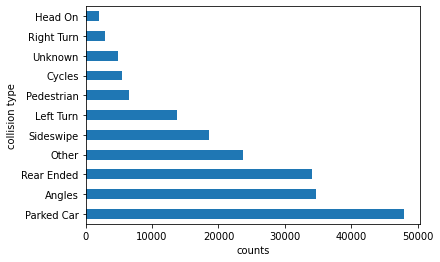

In [65]:
ax = pd.value_counts(df['COLLISIONTYPE']).plot.barh()
ax.set(xlabel='counts', ylabel='collision type')

In [81]:
df.groupby('COLLISIONTYPE').ROADCOND.unique().reset_index()

,COLLISIONTYPE,ROADCOND
0,Angles,"[Wet, Dry, Snow/Slush, Unknown, Ice, Other, Sa..."
1,Cycles,"[Dry, Wet, Unknown, Ice, Standing Water, Snow/..."
2,Head On,"[Dry, Wet, Snow/Slush, Other, Ice, Unknown, St..."
3,Left Turn,"[Dry, Wet, Unknown, Snow/Slush, Oil, Other, Ic..."
4,Other,"[Dry, Unknown, Wet, Snow/Slush, Ice, Standing ..."
5,Parked Car,"[Dry, Wet, Unknown, nan, Snow/Slush, Ice, Othe..."
6,Pedestrian,"[Dry, Wet, Unknown, nan, Snow/Slush, Other, Ic..."
7,Rear Ended,"[Wet, Dry, Unknown, nan, Snow/Slush, Ice, Sand..."
8,Right Turn,"[Dry, Wet, Unknown, Snow/Slush, Ice, Oil, nan]"
9,Sideswipe,"[Wet, Dry, Unknown, Ice, Snow/Slush, Standing ..."


In [88]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [101]:
df.groupby('COLLISIONTYPE').agg(dict(PERSONCOUNT='mean', PEDCOUNT='mean', VEHCOUNT='mean'))

,PERSONCOUNT,PEDCOUNT,VEHCOUNT
COLLISIONTYPE,,,
Angles,2.711974,0.001730,2.075849
Cycles,2.128717,0.018098,0.977839
Head On,2.731719,0.000000,2.126976
Left Turn,2.704225,0.001605,2.051886
Other,1.809433,0.002995,1.446062
Parked Car,2.234126,0.001500,2.146060
Pedestrian,2.176301,1.037682,1.014225
Rear Ended,2.851599,0.000792,2.222147
Right Turn,2.715494,0.001691,2.024696


In [104]:
df.groupby(['SEVERITYDESC', 'COLLISIONTYPE']).agg(dict(PERSONCOUNT='mean', PEDCOUNT='mean', VEHCOUNT='mean'))

PERSONCOUNT  PEDCOUNT  VEHCOUNT
SEVERITYDESC                   COLLISIONTYPE                                 
Injury Collision               Angles            2.928288  0.004110  2.105769
                               Cycles            2.130481  0.019393  0.973651
                               Head On           2.998853  0.000000  2.194954
                               Left Turn         2.865459  0.003881  2.076880
                               Other             1.996073  0.010798  1.455334
                               Parked Car        2.978963  0.024042  2.509767
                               Pedestrian        2.178235  1.038578  1.014319
                               Rear Ended        3.085202  0.001636  2.306659
                               Right Turn        2.949097  0.008210  2.067323
                               Sideswipe         3.031923  0.007183  2.203512
                               Unknown           2.021134  0.000000  0.011527
Property Damage Only Collision Angles            2.571971  0.000190  2.056485
                               Cycles            2.116244  0.008942  1.007452
                               Head On           2.529514  0.000000  2.075521
                               Left Turn         2.599011  0.000121  2.035576
                               Other             1.744585  0.000284  1.442840
                               Parked Car        2.190381  0.000177  2.124699
                               Pedestrian        2.159226  1.029762  1.013393
                               Rear Ended        2.675112  0.000154  2.158299
                               Right Turn        2.654879  0.000000  2.013634
                               Sideswipe         2.557412  0.000000  2.048252
                               Unknown           1.842092  0.000000  0.003365

In [102]:
df.groupby('SEVERITYDESC').agg(dict(PERSONCOUNT='mean', PEDCOUNT='mean', VEHCOUNT='mean'))

,PERSONCOUNT,PEDCOUNT,VEHCOUNT
SEVERITYDESC,,,
Injury Collision,2.714357,0.111896,1.867928
Property Damage Only Collision,2.329348,0.005268,1.943312


In [111]:
df[['SEVERITYCODE', 'SEVERITYDESC']].drop_duplicates().sort_values('SEVERITYCODE').style.hide_index()

SEVERITYCODE,SEVERITYDESC
1,Property Damage Only Collision
2,Injury Collision


[Text(0.5, 0, 'counts')]

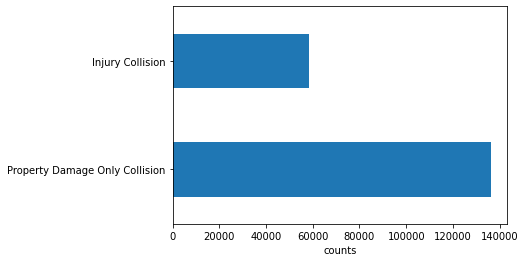

In [118]:
ax = df['SEVERITYDESC'].value_counts().plot.barh();
ax.set(xlabel='counts', )

In [131]:
df['COLLISIONTYPE'].unique()

array(['Angles', 'Sideswipe', 'Parked Car', 'Other', 'Cycles',
       'Rear Ended', 'Head On', 'Unknown', 'Left Turn', 'Pedestrian',
       'Right Turn'], dtype=object)

In [134]:
df['WEATHER'].unique()

array(['Overcast', 'Raining', 'Clear', nan, 'Unknown', 'Other', 'Snowing',
       'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt',
       'Severe Crosswind', 'Partly Cloudy'], dtype=object)

In [136]:
df['ROADCOND'].unique()

array(['Wet', 'Dry', nan, 'Unknown', 'Snow/Slush', 'Ice', 'Other',
       'Sand/Mud/Dirt', 'Standing Water', 'Oil'], dtype=object)

In [138]:
df['LIGHTCOND'].unique()

array(['Daylight', 'Dark - Street Lights On', 'Dark - No Street Lights',
       nan, 'Unknown', 'Dusk', 'Dawn', 'Dark - Street Lights Off',
       'Other', 'Dark - Unknown Lighting'], dtype=object)